In [3]:
from mpi4py import MPI
import numpy as np
from osgeo import gdal
from osgeo import osr
import os
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

class Dataset:
    def __init__(self, in_file):
        self.in_file = in_file  # Tiff或者ENVI文件

        dataset = gdal.Open(self.in_file)
        self.XSize = dataset.RasterXSize  # 网格的X轴像素数量
        self.YSize = dataset.RasterYSize  # 网格的Y轴像素数量
        self.Bands = dataset.RasterCount  # 波段数
        self.GeoTransform = dataset.GetGeoTransform()  # 投影转换信息
        self.ProjectionInfo = dataset.GetProjection()  # 投影信息
    
    def get_data(self):
        #band: 读取第几个通道的数据
        dataset = gdal.Open(self.in_file)
        data = dataset.ReadAsArray(0,0,self.XSize,self.YSize)
        return data

    def get_lon_lat(self):
        #获取经纬度信息
        gtf = self.GeoTransform
        x_range = range(0, self.XSize)
        y_range = range(0, self.YSize)
        x, y = np.meshgrid(x_range, y_range)
        lon = gtf[0] + x * gtf[1] + y * gtf[2]
        lat = gtf[3] + x * gtf[4] + y * gtf[5]
        lon_lat=np.array(list(zip(lon,lat)))
        return lon_lat
if __name__ == '__main__':
    dir_path = r"D:\Desktop\MPI-document"
    # dir_path = r"D:\Desktop"   
    filename = "gee-LAI-12656.tif"
    file_path = os.path.join(dir_path, filename)
    data_path = Dataset(file_path)
    data = data_path.get_data( ).transpose(1,2,0) 
    lon_lat = data_path.get_lon_lat().transpose(0,2,1)
    lon_lat_data=np.hstack((lon_lat.transpose(0,2,1),data.transpose(0,2,1))).transpose(0,2,1)
    sendbuf=lon_lat_data.reshape(-1,lon_lat_data.shape[2])
    # colum2=sendbuf.shape[1]
    # print(lon_lat_data.shape)
    # print(lon_lat_data[60,90,:])
    print(sendbuf[2000,:])

[-6.61110935e+06  4.57105468e+06  6.00000000e+00  1.00000000e+00
  2.00000000e+00  1.00000000e+00  1.00000000e+00  2.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
  1.00000000e+00  1.00000000e+00  2.00000000e+00  2.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  2.00000000e+00  5.00000000e+00  4.00000000e+00
  4.00000000e+00  4.00000000e+00  0.00000000e+00  7.00000000e+00
  5.00000000e+00  1.00000000e+01  1.10000000e+01  8.00000000e+00
  8.00000000e+00  1.50000000e+01  2.10000000e+01  1.90000000e+01
  4.50000000e+01  3.40000000e+01  4.20000000e+01  1.30000000e+01
  1.20000000e+01  2.10000000e+01  1.90000000e+01  1.10000000e+01
  2.20000000e+01  4.90000000e+01  4.80000000e+01  2.00000000e+00
  5.90000000e+01  3.40000000e+01  7.00000000e+00  4.80000000e+01
  4.50000000e+01  2.50000000e+01  5.50000000e+01  4.30000000e+01
  6.00000000e+00  1.90000000e+01  2.80000000e+01  6.00000000e+00
  3.20000000e+01  3.00000

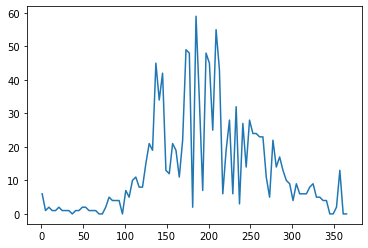

In [6]:
x=np.arange(1, 366,4)

y=sendbuf[2000,:][2::]
plt.plot(x,y)
plt.show()